In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("student-por.csv")

In [6]:
df.head().T

,0,1,2,3,4
school,GP,GP,GP,GP,GP
sex,F,F,F,F,F
age,18,17,15,15,16
address,U,U,U,U,U
famsize,GT3,GT3,LE3,GT3,GT3
Pstatus,A,T,T,T,T
Medu,4,1,1,4,3
Fedu,4,1,1,2,3
Mjob,at_home,at_home,at_home,health,other
Fjob,teacher,other,other,services,other


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 649 entries, 0 to 648
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   school      649 non-null    object
 1   sex         649 non-null    object
 2   age         649 non-null    int64 
 3   address     649 non-null    object
 4   famsize     649 non-null    object
 5   Pstatus     649 non-null    object
 6   Medu        649 non-null    int64 
 7   Fedu        649 non-null    int64 
 8   Mjob        649 non-null    object
 9   Fjob        649 non-null    object
 10  reason      649 non-null    object
 11  guardian    649 non-null    object
 12  traveltime  649 non-null    int64 
 13  studytime   649 non-null    int64 
 14  failures    649 non-null    int64 
 15  schoolsup   649 non-null    object
 16  famsup      649 non-null    object
 17  paid        649 non-null    object
 18  activities  649 non-null    object
 19  nursery     649 non-null    object
 20  higher    

In [8]:
#normalize the sex column
df['sex'].value_counts(normalize=True)

F    0.590139
M    0.409861
Name: sex, dtype: float64

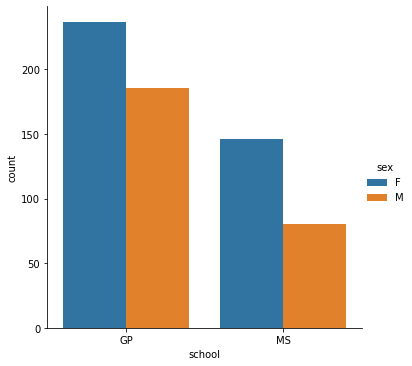

In [9]:
#chart the school/count of male and female
sns.catplot(x='school', hue='sex', data=df, kind= 'count')

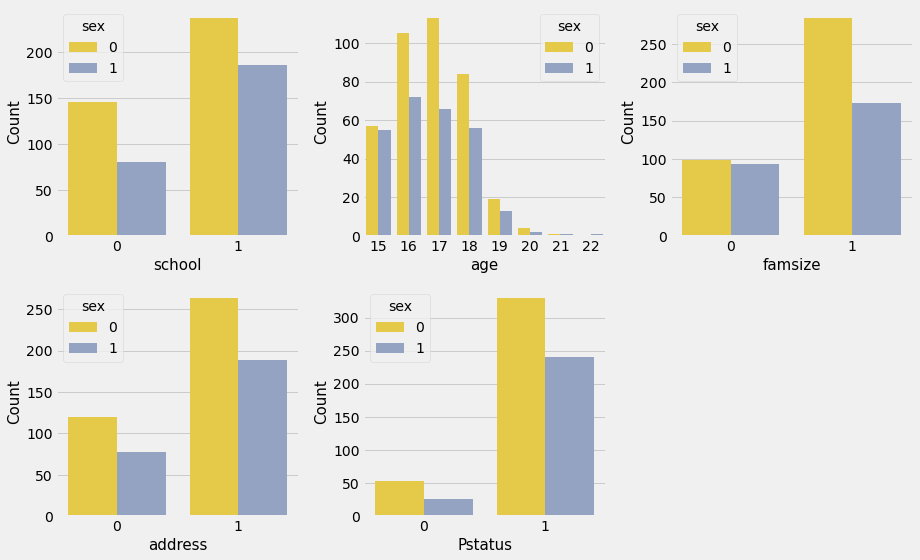

In [41]:
plt.style.use('fivethirtyeight')
fig=plt.figure()

cols=['school','age','famsize','address','Pstatus']


for i,col in enumerate(cols):
    fig.add_subplot(2,3,i+1)
    fig.set_size_inches(13,8)
    sns.countplot(x=col,data=df,hue='sex',
                  palette='Set2_r')
    plt.xlabel(col,fontsize=15)
    plt.ylabel('Count',fontsize=15)
    plt.tight_layout()
#female is 0 1 is male
#Below plots explain that,

#Most students belong to the Gabriel Peirera school.
#Most students come under the age group of 15-18 with almost equal proportion of males and females,
#Most students belong to family with size greater than or equal to 3.
#Students coming from urban area is higher compared to rural area.
#Cohabitation status of a student's parents is moslty together.

In [ ]:
#Let's explor a students's mother and father's job qualifications and how can 
#these two factors affect student's grades
#Below we observe plots for job qualifications of parents segregated \
#on how much a student receives family support from parents. Be it financially or
#personally. We can conclude that for the Mother's job qualifications the other category 
#has a considerabe amount of No's indicating that the students may not be receiving 
#family support from mothers with job qualifications as 'other'.It maybe a low income
#job,such the parent is not able to provide her child the right amount of financial
#support for education or any other factor could be responsible for the student not 
#getting adequate family educational support.

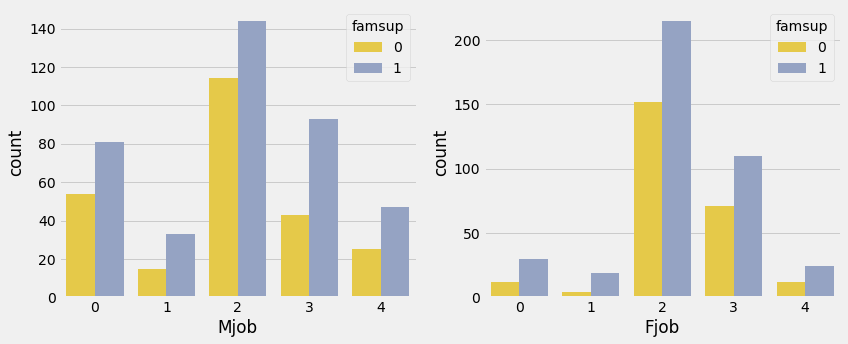

In [42]:
cols=['Mjob','Fjob']
fig=plt.figure()
for i,col in enumerate(cols):
    fig.add_subplot(1,2,i+1)
    fig.set_size_inches(12,5)
    sns.countplot(x=col,data=df,hue='famsup',palette='Set2_r')
    plt.tight_layout()

In [ ]:
#Below we observe that initially with students spending less time on travelling 
#have a considerably higher studytime on an average over the week.Futher towards 3 hrs 
#of travel time we see a drastic drop in study time of almost 10 hours on average each 
#week where (1=10 hours). Surprisingly for 4 hrs of travelling time there is sudden
#increase in study time for the students. Reasons can be effective time management by 
#students etc.

Text(0.5, 1.0, 'Travel time vs Stduy time')

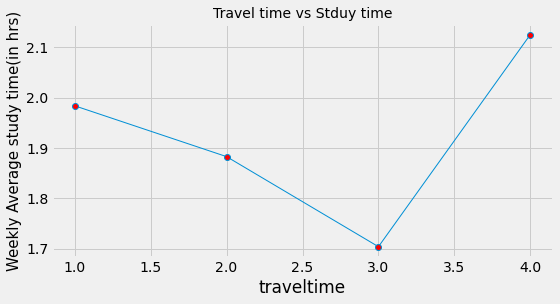

In [43]:
time=df.groupby('traveltime')['studytime'].mean().plot.line(figsize=(8,4),
                                                            marker='o',markerfacecolor='red',
                                                            linewidth=1)
plt.ylabel('Weekly Average study time(in hrs)',fontsize=15)
plt.title('Travel time vs Stduy time',fontsize=14)

In [ ]:
#Below line plots show the distribution of students grades 
#**G1** and **G2** over their weekly avg study time. Moreover how does internet 
#usage affect the grades can also be concluded through the plots. For both grades we 
#can observe that with no internet accessibility and low study hours the students 
#grades are poor.But on the contrary although the student studies for less time the
#grades obtained is comparatively better for those who have internet accessibility.
#Lastly with increasing study time no internet students show a drastic improvemnet 
#in marks while those with internet and good study hours are able to make slight 
#imporvements in their grades for G2 and slight derement in grades for G1.Reasons: 
#students with internet can waste time while those without it can concentrate properly 
#on their studies. It depends on how effectively a student uses the internet for hie/her 
#studies.

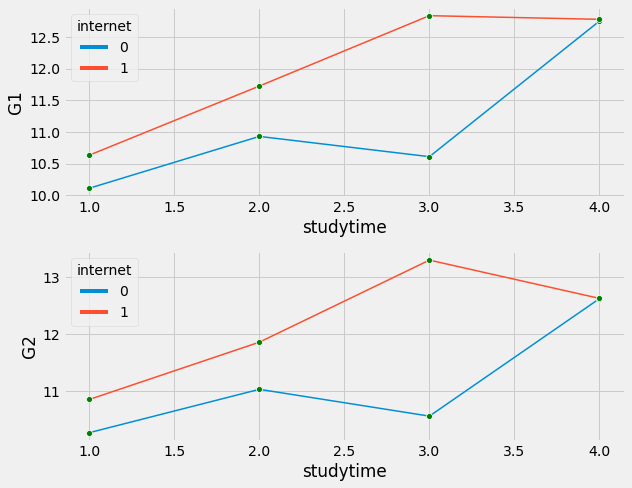

In [44]:
grades=['G1','G2']
fig=plt.figure()
for i,col in enumerate(grades):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(9,7)
    
    x=df.groupby(['internet','studytime'])[col].mean()
    x=x.reset_index('studytime')
    
    sns.lineplot(x='studytime',y=col,hue=x.index,data=x,
                 marker='o',markerfacecolor='green',linewidth=1.5)
    plt.tight_layout()
#blue is no red is yes

In [ ]:
#Below line plots illustrate how daily alcohol consumptions affect tha grades of students.
#Prominently students with average to good health have avearge to better grades even
#with a considerable increase in their alcohol consumption. But one thing to notice is 
#that students with extremely poor health initially have achieved good grades, but with 
#an increase in alcohol consumption their grades have drastically deteriorated taken into
#account their poor health and increased alcohol intake.

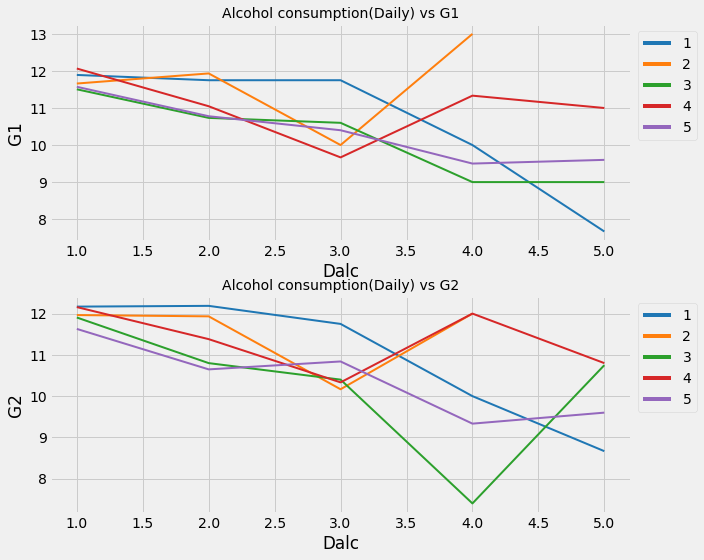

In [45]:
cols=['G1','G2']
fig=plt.figure()

for i,col in enumerate(cols):
    fig.add_subplot(2,1,i+1)
    fig.set_size_inches(10,8)
    
    health=df.groupby(['Dalc','health'])[col].mean()
    health=health.reset_index('Dalc')
    
    sns.lineplot(x='Dalc',y=col,hue=health.index,
                 data=health,palette='tab10',linewidth=2)
    plt.tight_layout()
    plt.title(f'Alcohol consumption(Daily) vs {col}',fontsize=14)
    plt.legend(bbox_to_anchor=(1,1))

<AxesSubplot:>

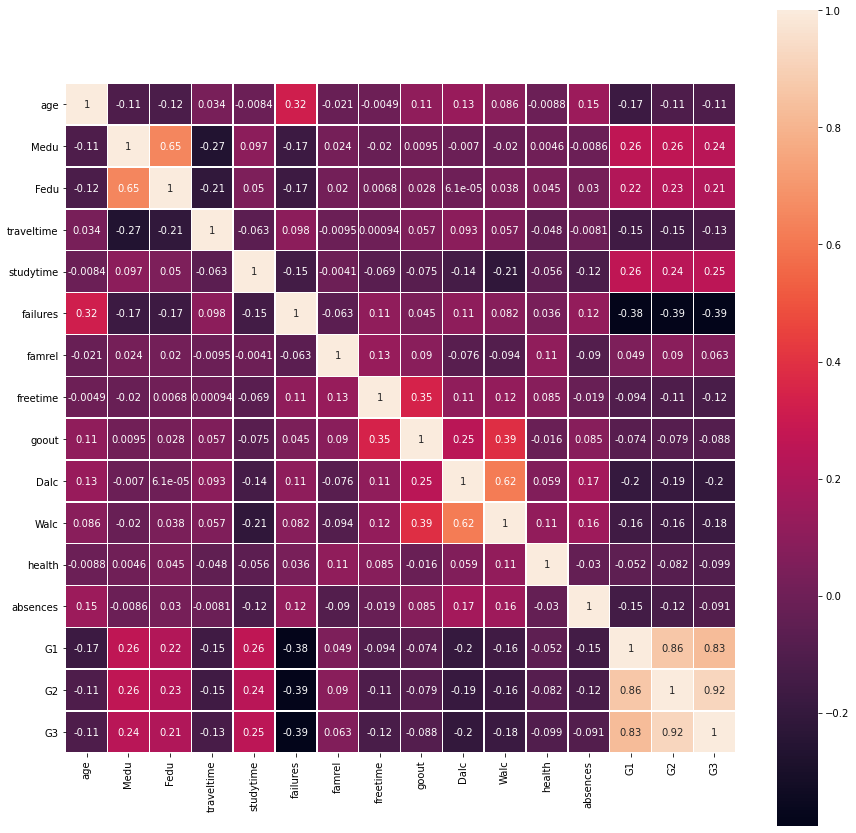

In [10]:
#correlation heat map
plt.figure(figsize=(15, 15))

sns.heatmap(df.corr(), square = True, annot=True, linewidth=0.5)

/Users/juge/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='G3', ylabel='Density'>

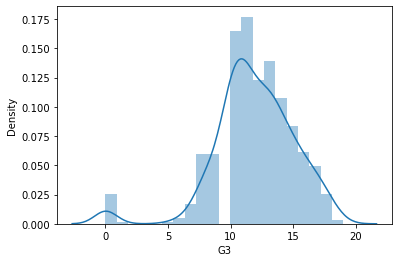

In [12]:
#distribution plot of G3 column
sns.distplot(df['G3'], kde=True)

In [13]:
#transform columns into binary numbers
df.loc[df['school'] == 'GP', 'school'] = 1
df.loc[df['school'] == 'MS', 'school'] = 0

df.loc[df['sex'] == 'M', 'sex'] = 1
df.loc[df['sex'] == 'F', 'sex'] = 0

df.loc[df['address'] == 'U', 'address'] = 1
df.loc[df['address'] == 'R', 'address'] = 0

df.loc[df['famsize'] == 'GT3', 'famsize'] = 1
df.loc[df['famsize'] == 'LE3', 'famsize'] = 0


df.loc[df['Pstatus'] == 'T', 'Pstatus'] = 1
df.loc[df['Pstatus'] == 'A', 'Pstatus'] = 0

In [14]:
#transform variable to yes or no
for col in ['schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']:

    df[col] = df[col].map({'yes': 1, 'no': 0})

In [16]:
#transforming various categories using the pandas category
for col in ['Mjob','Fjob', 'reason', 'guardian']:
    #transofmr text to catagory
    df[col] = df[col].astype('category')
    #save only numbers of each catgegory
    df[col] = df[col].cat.codes
    

In [17]:
#import sklearn
from sklearn.model_selection import train_test_split

In [18]:
#separating the dataframe in three different tests
train, test = train_test_split(df, test_size=0.2, random_state=42)

In [21]:
train.shape, test.shape

((519, 33), (130, 33))

In [22]:
#selecting the columns we will be using
remove = ['G1', 'G2', 'G3']

In [24]:
#list of main columns
feats = [col for col in df.columns if col not in remove]

In [25]:
#import linear model from sklearn
from sklearn import linear_model

regr = linear_model.LinearRegression()

In [27]:
#train
regr.fit(X = train[feats], y= train['G3'])

LinearRegression()

In [28]:
#predictions
preds = regr.predict(X = test[feats])

In [31]:
# for linear regression the score of 1 is the highest you can get, thus these scores are not great
preds

array([12.332019  , 12.88496096, 13.20441984, 12.30793897, 10.20946218,
       12.03725272, 13.19273317,  6.55820268, 13.22813986, 12.0487525 ,
       11.92528452, 12.33911338, 13.81699475, 12.08908766,  9.5420385 ,
       14.23559878, 13.47512797, 10.12646595, 13.7753185 , 14.74053945,
       12.80631909, 12.62874214, 14.42789883, 13.42594221, 11.54480954,
       13.05101429,  9.74729046, 14.56646221, 11.50718194, 13.67832239,
       12.22449218, 13.64599114,  7.66569684,  5.49309805, 10.0038987 ,
       13.50692383, 13.12665096, 14.54192106, 12.73440879, 11.80694437,
       13.16333666, 13.48870567, 12.32543327, 13.97983091, 12.40975711,
       11.22766425, 12.25972127, 13.22372509, 13.62970443, 11.54060289,
       11.48678212, 13.73764264, 10.24744162,  8.97631759, 12.17087754,
       14.4759839 , 11.61704595, 10.18408272, 10.21658183, 11.22752834,
        5.62951603, 12.6357854 , 13.45244903, 13.86494089, 13.98649781,
       14.37962831, 11.63906586,  7.01536127,  7.01870808, 10.21

In [32]:
test['G3'].head()

636    19
220    12
594    18
429    11
72     11
Name: G3, dtype: int64

In [34]:
#import mean squared error
from sklearn.metrics import mean_squared_error

In [35]:
#MSE is perfect at 0, so this is getting better score wise
mean_squared_error(test['G3'], preds)

8.075803187948484

In [36]:
#import r2 score
from sklearn.metrics import r2_score

r2_score(test['G3'], preds)

0.17185824448235854

In [37]:
preds2= regr.predict(X=train[feats])

In [38]:
#MSE is perfect at 0, so this is getting better score wise
mean_squared_error(train['G3'], preds2), r2_score(train['G3'], preds2)

(6.635253259169582, 0.36962582941312105)

In [39]:
#lets see how the model preforms using highly correlated values
remove2 =['G3']
feats2 = [col for col in train.columns if col not in remove2]
regr2 = linear_model.LinearRegression()
regr2.fit(X= train[feats2], y= train['G3'])
preds2 = regr2.predict(test[feats2])
#MSE is perfect at 0, so this is getting better score wise, this is getting to be fairly accurate
mean_squared_error(test['G3'], preds2), r2_score(test['G3'], preds2)

(1.4370937042410006, 0.8526317103852279)